In [74]:
from numpy import *
from pandas import *
from matplotlib.pyplot import *
dataset=read_csv('alcohol consumption.csv')
del(dataset['Unnamed: 0'])
#dataset.columns=['year','population_year_wise(in_millions)','unemployed','tax_on_alcohol','alcohol_consumption_in_india']
x= dataset.iloc[:, [5,6,7]]
y = dataset.iloc[:, -1:]
m,n=shape(x)
dataset.head()

,year,population_year_wise_in_millions,unemployed_in_millions,urban_population,rural_population,unemployed_urban,unemployed_rural,tax_on_alcohol,consumption_in_urban_areas,consumption_in_rural_areas,total_consumption_of_alcohol
0,1992,906.021,33.522777,282.316144,623.704856,3.254879,15.886262,10.0,254.084529,1684.003112,1902.6441
1,1993,924.057,34.374920,287.936161,636.120839,3.337618,16.290088,11.0,267.780630,1736.609890,1940.5197
2,1994,942.204,35.332650,293.590766,648.613234,3.430608,16.743951,12.0,281.847136,1790.172525,1978.6284
3,1995,960.482,36.306220,299.286191,661.195809,3.525136,17.205320,13.0,296.293329,1844.736307,2017.0122
4,1996,978.893,37.295823,305.023059,673.869941,3.621222,17.674288,14.0,311.123520,1900.313234,2055.6753


,year,population_year_wise_in_millions,unemployed_in_millions,urban_population,rural_population,unemployed_urban,unemployed_rural,tax_on_alcohol,consumption_in_urban_areas,consumption_in_rural_areas,total_consumption_of_alcohol
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2004.500000,1130.440654,50.283667,352.245308,778.195346,4.882270,23.829156,22.500000,458.331287,2413.316636,2373.925373
std,7.648529,134.166538,10.582321,41.806293,92.360245,1.027486,5.014904,7.648529,133.994658,461.922756,281.749730
min,1992.000000,906.021000,33.522777,282.316144,623.704856,3.254879,15.886262,10.000000,254.084529,1684.003112,1902.644100
25%,1998.250000,1020.625000,41.437375,318.026750,702.598250,4.023344,19.636947,16.250000,345.886517,2028.824083,2143.312500
50%,2004.500000,1135.050000,49.773300,353.681580,781.368420,4.832717,23.587296,22.500000,450.986314,2402.801342,2383.605000
75%,2010.750000,1243.150000,59.767170,387.365540,855.784460,5.803067,28.323337,28.750000,566.550497,2792.059531,2610.615000
max,2017.000000,1339.200000,66.290400,417.294720,921.905280,6.436437,31.414660,35.000000,688.536288,3180.573216,2812.320000


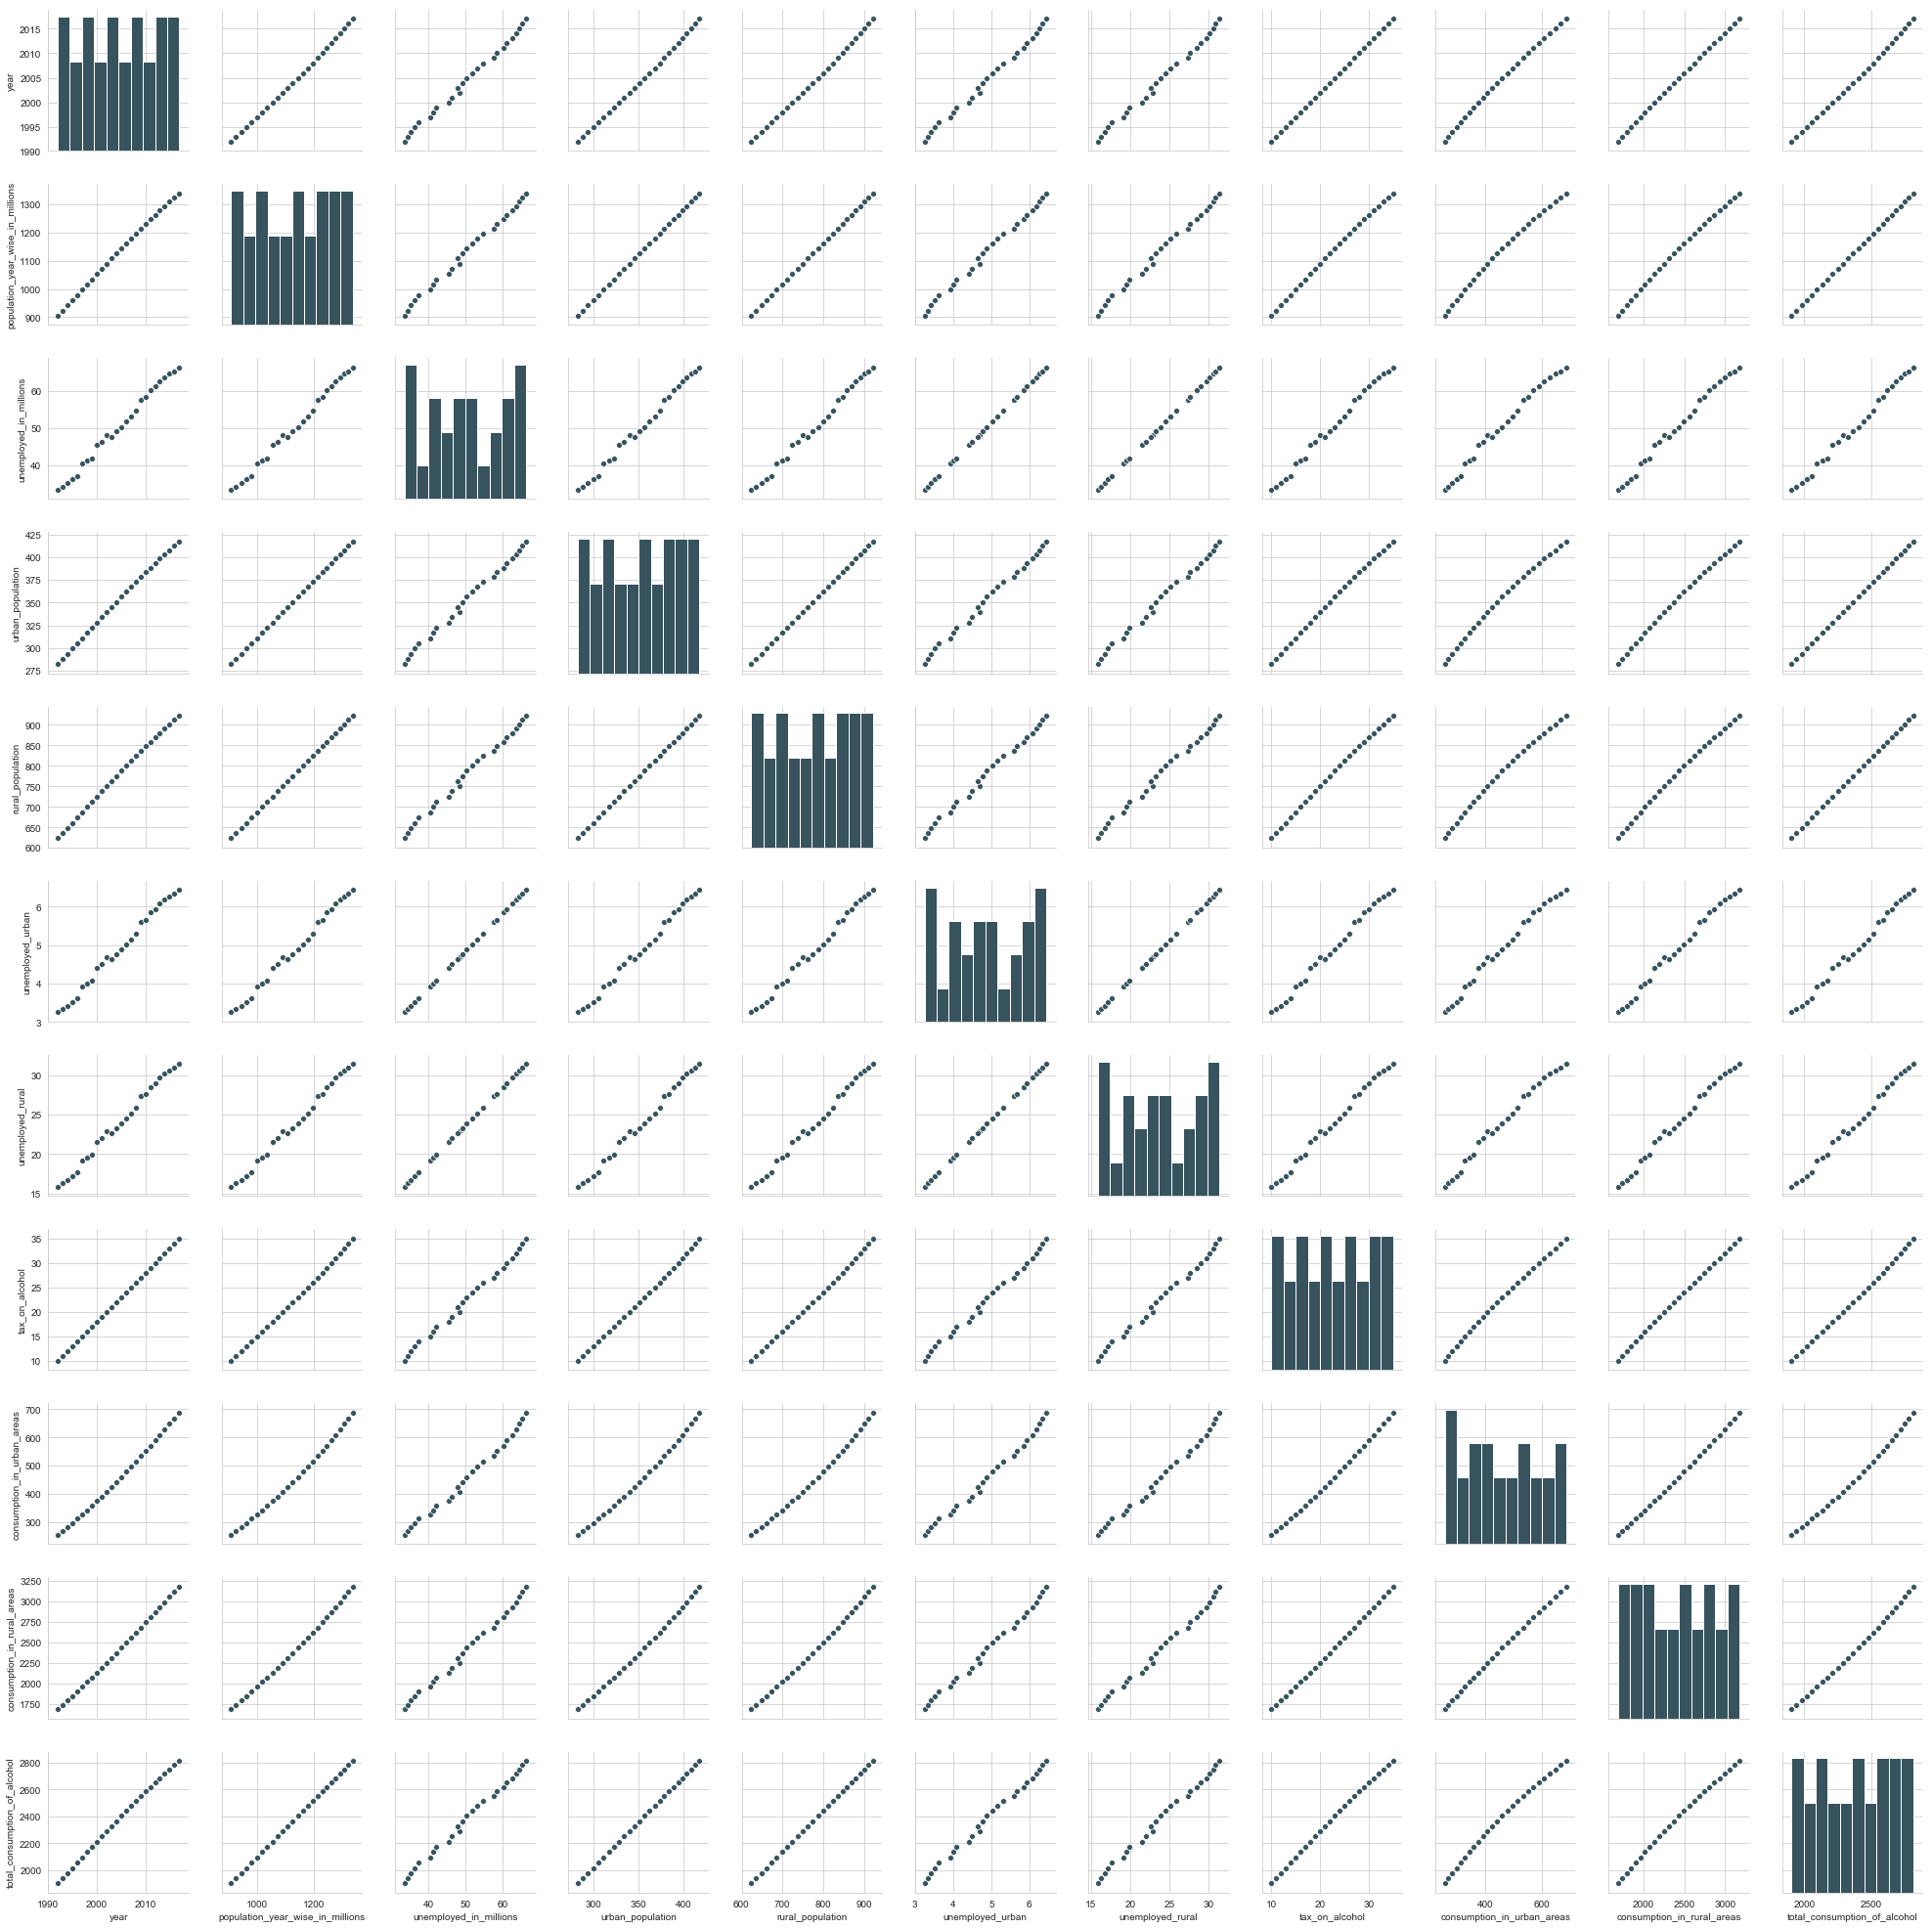

In [75]:
from seaborn import *
set_palette("GnBu_d")
set_style('whitegrid')
pairplot(dataset)
dataset.describe()

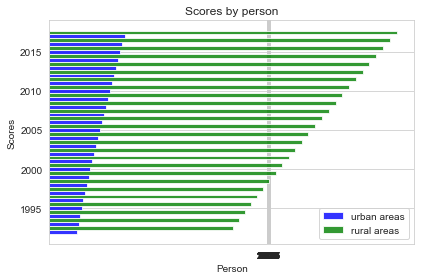

In [76]:
fig, ax = subplots()
bar_width = 0.5
opacity = 0.8

plot1 = barh( dataset.iloc[:,0],dataset.iloc[:,8],bar_width,
alpha=opacity,
color='b',
label='urban areas')

plot2 = barh(dataset.iloc[:,0] + bar_width, dataset.iloc[:,9], bar_width,
alpha=opacity,
color='g',
label='rural areas')

xlabel('Person')
ylabel('Scores')
title('Scores by person')
xticks(dataset.iloc[:,0] + bar_width, dataset.iloc[:,0])
legend()

tight_layout()
show()

R2_score: 0.9984314804319092 mean squared error: 91.0809949676103 mean absolute error: 8.34287395983148 intercept: [1451.32285236]
coeffecients:                   Coeffecient
unemployed_urban     2.038060
unemployed_rural     9.947266
tax_on_alcohol      29.971735


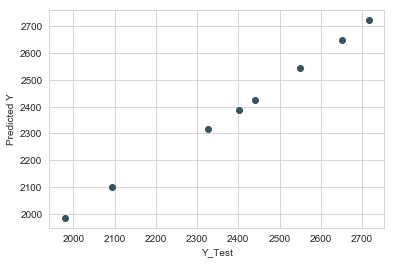

In [77]:
from sklearn import *
from sklearn.cross_validation import *
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.linear_model import *
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
variance=metrics.r2_score(y_test,y_pred)
intercept=regressor.intercept_
coef1=regressor.coef_
MSE=metrics.mean_squared_error(y_test,y_pred)
MAE=metrics.mean_absolute_error(y_test,y_pred)
print("R2_score:",variance,'mean squared error:',MSE,'mean absolute error:',MAE,'intercept:',intercept)
scatter(sort(y_test),sort(y_pred),linewidths=1.0)
ylabel('Predicted Y')
xlabel('Y_Test')
coef = DataFrame(coef1.reshape(n,1),x.columns)
coef.columns = ['Coeffecient']
print('coeffecients:',coef)

higher unemployment and higher tax then alcohol consumption is: [[2862.88422742]]
lower unemployment and higher tax then alcohol consumption is: [[2685.6284722]]
higher unemployment and lower tax then alcohol consumption is: [[2083.61912056]]
lower unemployment and lower tax then alcohol consumption is: [[1906.36336535]]


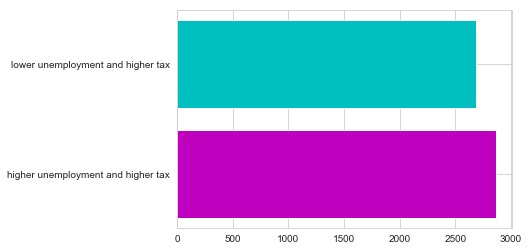

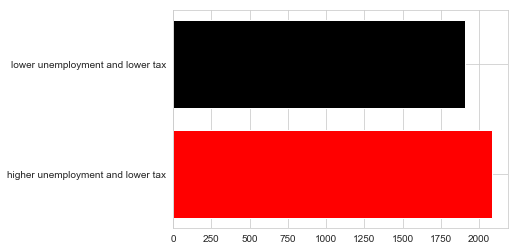

In [78]:
print('higher unemployment and higher tax then alcohol consumption is:',regressor.predict(array([7,32,36]).reshape(1,-1)))
print('lower unemployment and higher tax then alcohol consumption is:',regressor.predict(array([3,15,36]).reshape(1,-1)))
print('higher unemployment and lower tax then alcohol consumption is:',regressor.predict(array([7,32,10]).reshape(1,-1)))
print('lower unemployment and lower tax then alcohol consumption is:',regressor.predict(array([3,15,10]).reshape(1,-1)))
ac1=[float(regressor.predict(array([7,32,36]).reshape(1,-1))),float(regressor.predict(array(array([3,15,36]).reshape(1,-1))))]
ac2=[float(regressor.predict(array(array([7,32,10]).reshape(1,-1)))),float(regressor.predict(array([3,15,10]).reshape(1,-1)))]
colors1=['m','c']
colors2=['r','k']
index1=['higher unemployment and higher tax', 'lower unemployment and higher tax']
index2=['higher unemployment and lower tax','lower unemployment and lower tax']
barh(index1,ac1,color=colors1,align='center')
show()
barh(index2,ac2,color=colors2,align='center')
show()